In [2]:
#Importing all the required libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importing the Data Set
path = 'C:/Users/Rahul_Tiwari4/Downloads/iris-flower-dataset/Iris.csv'
iris = pd.read_csv(path)

In [4]:
# Checking for the first 5 rows in the data set
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Checking for the number of rows and columns
iris.shape

(150, 5)

In [6]:
# Checking for Some More statistical information for the entire data set like std. deviation, mean, total count etc..
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Checking whether the different species data set is a balanced not? Looks perfectly Balanced as 
#every specie has equal count of rows
iris.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

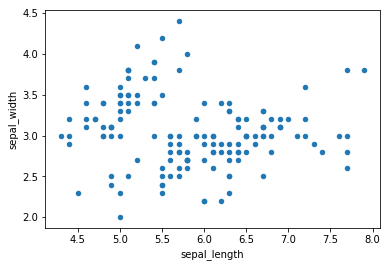

In [8]:
#Data Visualization using a Scatter Plot between two variables
iris.plot(kind = 'scatter',x='sepal_length',y = 'sepal_width');
plt.show()

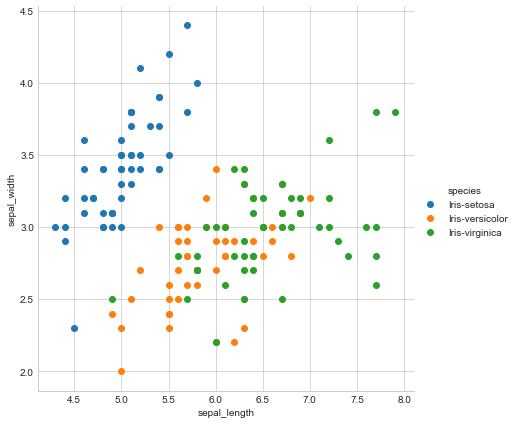

In [9]:
# 2D Plot with different color-coding for each flower species
sns.set_style('whitegrid')
sns.FacetGrid(iris,hue = 'species',size = 6) \
   .map(plt.scatter,'sepal_length','sepal_width')\
   .add_legend();

plt.show();

#In Below Plot blue points can be easily separated from red and green by drawing a line but 
#red and green data points cannot be easily separated. Some More detailed plots needed to check for that.

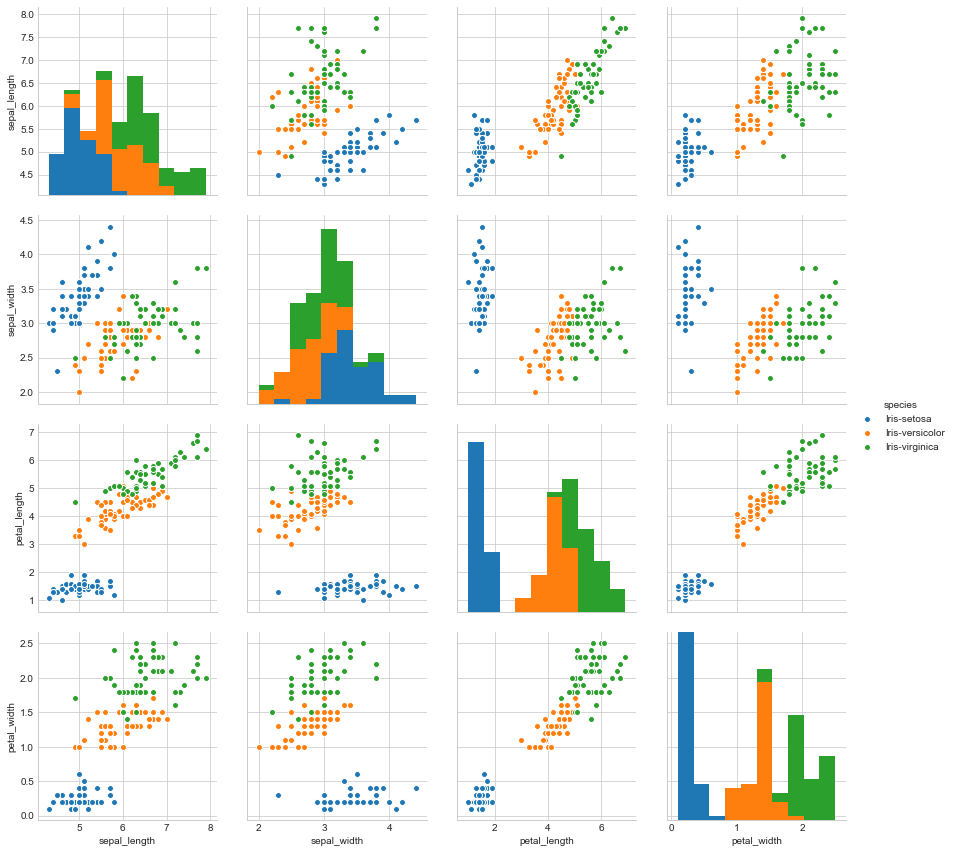

In [29]:
#Plotting all the combinations with 4 variables with help of pair-plots
sns.set_style('whitegrid');
sns.pairplot(iris,hue='species',size = 3);
plt.show();

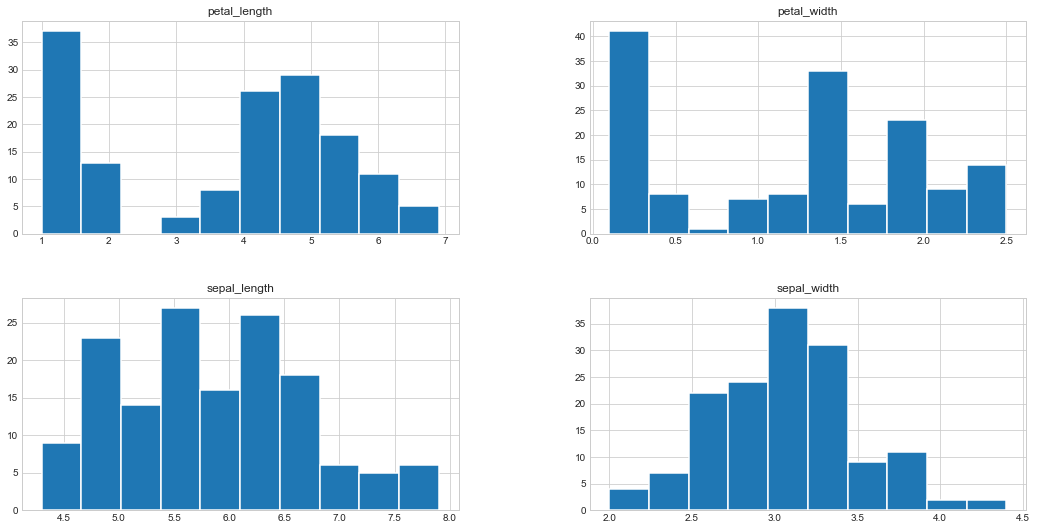

In [12]:
iris.hist(edgecolor='white', linewidth=1.5)
fig = plt.gcf()
fig.set_size_inches(18, 9)
plt.show()

In [14]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.cross_validation import train_test_split # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

In [16]:
#Correlation values between all the variables with each other
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


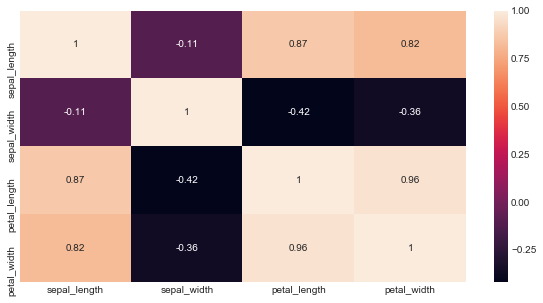

In [21]:
plt.figure(figsize = (10,5));
sns.heatmap(iris.corr(),annot = True);
plt.show();

In [29]:
#Splitting The Data into Training And Test Dataset
train,test = train_test_split(iris,test_size = 0.3);
print(train.shape);
print(test.shape);

(105, 5)
(45, 5)


In [34]:
#Assigning the Independent & Dependent Data attributes to a DataFrame for training and test variables.
x_train = train[['sepal_length','sepal_width','petal_length','petal_width']] # Independent Data Frame
y_train = train.species # Dependent Data Frame

In [38]:
x_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

In [44]:
#Now we need to implement various ML Algorithms like SVM, Decision Tree, Logistic Regression and more..
#to check for which one provides best accuracy?
model1 = svm.SVC()
model1.fit(x_train,y_train)  # we usually train our model with Training Data and Prediction based on Test Data.
pred = model1.predict(x_test)
print('The accuracy for our SVM Model is: ', metrics.accuracy_score(pred, y_test))

The accuracy for our SVM Model is:  0.9777777777777777


In [45]:
#Next Model - Decision Tree
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)
pred2 = model2.predict(x_test)
print('The accuracy for our Decision Tree Model is: ', metrics.accuracy_score(pred2, y_test))

The accuracy for our Decision Tree Model is:  0.9555555555555556


In [46]:
#Next Model - Logistic Regression
model3 = LogisticRegression()
model3.fit(x_train,y_train)
pred3 = model3.predict(x_test)
print('The accuracy for our LR Model is: ', metrics.accuracy_score(pred3, y_test))

The accuracy for our LR Model is:  0.9333333333333333


In [56]:
#Next Model - K-Nearest Neighbors
model4 = KNeighborsClassifier(n_neighbors=4) # this will check for 4 neighbors for putting the data into class
model4.fit(x_train,y_train)
pred4 = model4.predict(x_test)
print('The accuracy for KNN Model is: ', metrics.accuracy_score(pred4, y_test))

#From all the models after evaluating we can see the SVM and KNN both provided same highest accuracy over others.

The accuracy for KNN Model is:  0.9777777777777777


In [51]:
#Now we will get into some more insights to check further as to what combination of variables will work best for
#predicting an unknown flower species?
# Below we have segregated the variables into two different data sets one for Sepals & other Petals dimensions.

#Petals - 
ptls = iris[['petal_length','petal_width','species']]

#Sepals - 
spls = iris[['sepal_length','sepal_width','species']]

In [53]:
#Splitting below the Petals Data Set
train_ptl,test_ptl = train_test_split(ptls,test_size = 0.3,random_state = 0)
xp_train = train_ptl[['petal_length','petal_width']]
yp_train = train_ptl.species

xp_test = test_ptl[['petal_length','petal_width']]
yp_test = test_ptl.species

In [54]:
#Splitting below the Sepals Data Set
train_spl,test_spl = train_test_split(spls,test_size = 0.3,random_state = 0)
xs_train = train_spl[['sepal_length','sepal_width']]
ys_train = train_spl.species

xs_test = test_spl[['sepal_length','sepal_width']]
ys_test = test_spl.species

In [55]:
# Evaluating accuracies for both Petals and Sepals Data using SVM ML algorithm
model=svm.SVC()
model.fit(xp_train,yp_train) 
prediction=model.predict(xp_test) 
print('The accuracy for SVM using Petals is:',metrics.accuracy_score(prediction,yp_test))

model=svm.SVC()
model.fit(xs_train,ys_train) 
prediction=model.predict(xs_test) 
print('The accuracy for SVM using Sepals is:',metrics.accuracy_score(prediction,ys_test))

The accuracy for SVM using Petals is: 0.9777777777777777
The accuracy for SVM using Sepals is: 0.8


In [57]:
# Next same done using KNN just to check for better accuracy if available.
model=KNeighborsClassifier(n_neighbors = 4)
model.fit(xp_train,yp_train) 
prediction=model.predict(xp_test) 
print('The accuracy for KNN using Petals is:',metrics.accuracy_score(prediction,yp_test))

model=KNeighborsClassifier(n_neighbors = 4)
model.fit(xs_train,ys_train) 
prediction=model.predict(xs_test) 
print('The accuracy for KNN using Sepals is:',metrics.accuracy_score(prediction,ys_test))

The accuracy for SVM using Petals is: 0.9555555555555556
The accuracy for SVM using Sepals is: 0.8222222222222222


In [ ]:
#END Result:
#Using Petals over Sepals for training the data gives a much better accuracy as shown above for both models.
#We also saw in the heatmap above that the correlation between the Sepal Width and Sepal Length was low 
#whereas the correlation between Petal Width and Length was very high which concludes and tells to use 
#Petals length and Petal Width to provide better Prediction and Accuracy.